<H1><center>Tarea 6, Estadística Matemática</center></H1>
<H4><center>Daniela Alvarez Rodriguez</center></H4>
<H3><center>Codigo : 202020209</center></H3>
<H1></H1>

<hr style="border:2px solid gray"> </hr>

In [2]:
#Punto 1(d)
from scipy.stats import f

n = 10
m = 5

pdf = f(2*n,2*m)

a = pdf.ppf(0.025)
b = pdf.ppf(0.975)

print("a = " + str(a))
print("b = " + str(b))

a = 0.36053297767772674
b = 3.4185435161850357


m,n =  20 , 50
Muestras donde theta estuvo dentro del intervalo = 958
Muestras donde theta estuvo afuera del intervalo = 42
Promedio de longitudes de los intervalos= 2.30649153782114
m,n =  50 , 20
Muestras donde theta estuvo dentro del intervalo = 955
Muestras donde theta estuvo afuera del intervalo = 45
Promedio de longitudes de los intervalos= 2.23584643762341
m,n =  200 , 200
Muestras donde theta estuvo dentro del intervalo = 958
Muestras donde theta estuvo afuera del intervalo = 42
Promedio de longitudes de los intervalos= 0.8012635776084612


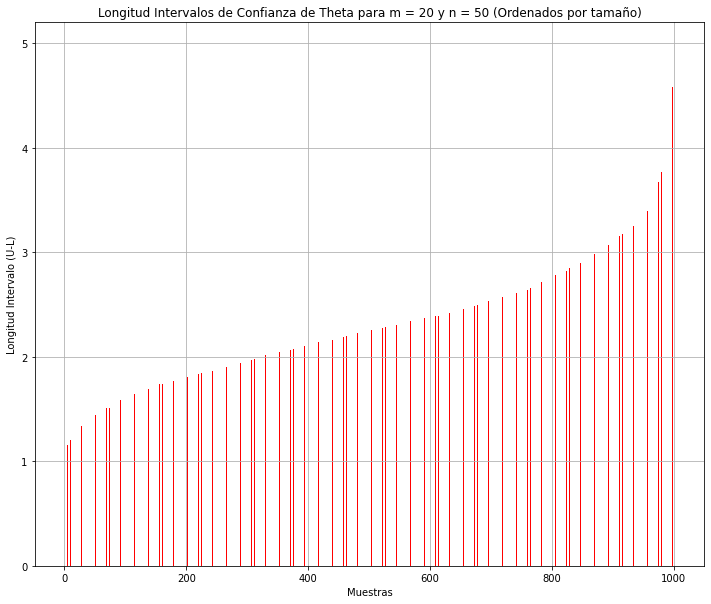

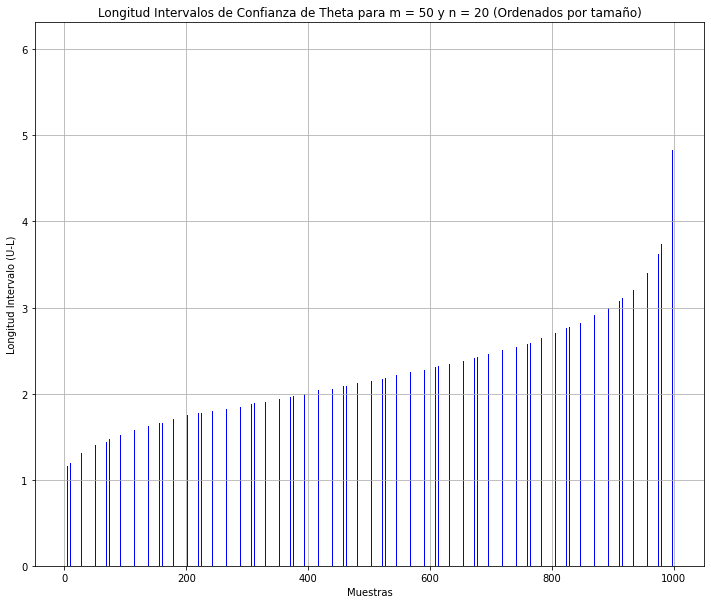

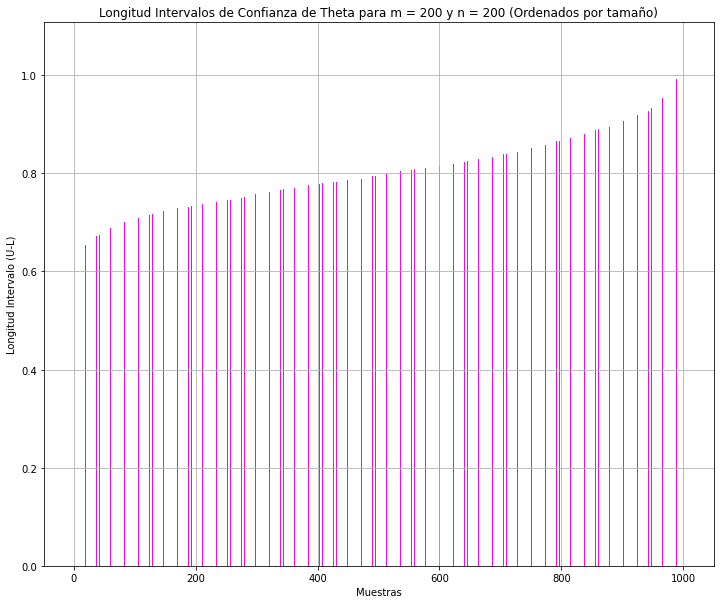

In [24]:
#Punto 2
import scipy.stats as ss
from scipy.stats import expon 
import matplotlib.pyplot as plt 

theta = 2
lamda = 1
k = [(20, 50),(50, 20),(200, 200)]
Intervals = []

for i in range(0,3):
    m = k[i][0]
    n = k[i][1]
    pdf = f(2*n,2*m)
    a = pdf.ppf(0.025)
    b = pdf.ppf(0.975)
    inLU=0   #Contador de veces donde theta cae dentro del intervalo de confianza [L,U]
    Int = [] #Longitud Intervalos de confianza para (m,n)
    for i in range(0,1000):
        X = expon.rvs(scale = 1/lamda, size = m)
        Y = expon.rvs(scale = 1/(lamda*theta) , size = n)
        meanX = X.mean()
        meanY = Y.mean()
        L = a*(meanX/meanY)
        U = b*(meanX/meanY)
        long = U-L
        Int.append(long)
        if (theta >= L):
            if (theta <= U):
                inLU+=1
    outLU = 1000 - inLU
    prom = ss.tmean(Int)
    print("m,n = ", m, ",", n)
    print("Muestras donde theta estuvo dentro del intervalo =",inLU)
    print("Muestras donde theta estuvo afuera del intervalo =",outLU)
    print("Promedio de longitudes de los intervalos=",prom)
    print('=====================')
    Int.sort()
    Intervals.append(Int)

xaxis = list(range(1,1001))

fig, ax = plt.subplots(figsize=[12,10])
ax.bar(xaxis,Intervals[0], width=0.1,color = "red")
plt.grid()
plt.title('Longitud Intervalos de Confianza de Theta para m = 20 y n = 50 (Ordenados por tamaño)')
plt.xlabel('Muestras')
plt.ylabel('Longitud Intervalo (U-L)')
plt.show()

fig, ax = plt.subplots(figsize=[12,10])
ax.bar(xaxis,Intervals[1], width=0.1,color = "blue")
plt.grid()
plt.title('Longitud Intervalos de Confianza de Theta para m = 50 y n = 20 (Ordenados por tamaño)')
plt.xlabel('Muestras')
plt.ylabel('Longitud Intervalo (U-L)')
plt.show()

fig, ax = plt.subplots(figsize=[12,10])
ax.bar(xaxis,Intervals[2], width=0.1,color = "magenta")
plt.grid()
plt.title('Longitud Intervalos de Confianza de Theta para m = 200 y n = 200 (Ordenados por tamaño)')
plt.xlabel('Muestras')
plt.ylabel('Longitud Intervalo (U-L)')
plt.show()

In [32]:
#Punto 3
import scipy.stats as ss
from scipy.stats import expon 
import matplotlib.pyplot as plt 
import numpy

lamda = 1
k = [20,50,100,500,1000]
R = []

for i in range(0,5):
    n = k[i]
    inLU1=0   #Contador de veces donde lamda cae dentro del intervalo de confianza [L,U]
    inLU2=0
    inLU3=0
    Cont = [inLU1,inLU2,inLU3]
    for i in range(0,1000):
        X = expon.rvs(scale = 1/lamda, size = n)
        meanX = X.mean()
        lamda2 = 1/meanX
        a1 = lamda2/(1 + (1.96/numpy.sqrt(n)))
        b1 = lamda2/(1 - (1.96/numpy.sqrt(n)))
        a2 = lamda2 - (lamda2*1.96)/numpy.sqrt(n)
        b2 = lamda2 + (lamda2*1.96)/numpy.sqrt(n)
        a3 = lamda2*numpy.exp(-1.96/numpy.sqrt(n))
        b3 = lamda2*numpy.exp(1.96/numpy.sqrt(n))
        Int = [(a1,b1),(a2,b2),(a3,b3)]
        for j in range(0,3):
            L = Int[j][0]
            U = Int[j][1]
            if (lamda >= L):
                if (lamda <= U):
                    a = Cont[j]
                    Cont[j] = a + 1

    R.append(Cont)
    print("n = ", n)
    print("Primer Método:")
    print("Muestras donde lamda estuvo dentro del intervalo =",Cont[0])
    print("Muestras donde lamda estuvo afuera del intervalo =",10000 - Cont[0])
    print("Segundo Método:")
    print("Muestras donde lamda estuvo dentro del intervalo =",Cont[1])
    print("Muestras donde lamda estuvo afuera del intervalo =",10000 - Cont[1])
    print("Tercer Método:")
    print("Muestras donde lamda estuvo dentro del intervalo =",Cont[2])
    print("Muestras donde lamda estuvo afuera del intervalo =",10000 - Cont[2])
    print('=====================')

n =  20
Primer Método:
Muestras donde lamda estuvo dentro del intervalo = 922
Muestras donde lamda estuvo afuera del intervalo = 9078
Segundo Método:
Muestras donde lamda estuvo dentro del intervalo = 948
Muestras donde lamda estuvo afuera del intervalo = 9052
Tercer Método:
Muestras donde lamda estuvo dentro del intervalo = 939
Muestras donde lamda estuvo afuera del intervalo = 9061
n =  50
Primer Método:
Muestras donde lamda estuvo dentro del intervalo = 938
Muestras donde lamda estuvo afuera del intervalo = 9062
Segundo Método:
Muestras donde lamda estuvo dentro del intervalo = 951
Muestras donde lamda estuvo afuera del intervalo = 9049
Tercer Método:
Muestras donde lamda estuvo dentro del intervalo = 942
Muestras donde lamda estuvo afuera del intervalo = 9058
n =  100
Primer Método:
Muestras donde lamda estuvo dentro del intervalo = 943
Muestras donde lamda estuvo afuera del intervalo = 9057
Segundo Método:
Muestras donde lamda estuvo dentro del intervalo = 954
Muestras donde lamda